# Train First Model

In [47]:
import warnings

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor

%load_ext autoreload
%autoreload 2
from feature_engineering import *
from model_experimentation import *

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
granularity = 'day'
df = pd.read_parquet(f"./../../data/model_train/2022_06_20_wind_dataset_lags_central_tendency_dispersion_{granularity}.gzip")

In [49]:
def run_experiments(df,models=[LinearRegression(n_jobs=-1)],use_validation=False,target_time_windows=['1h','3h','6h'],target_name='WIND_SPEED_ms',targets_to_drop=[]):
    
    experiment_tracking = []
    for target_time_window in target_time_windows:
        if use_validation:
            datasets = setup_datasets_for_experiment(df,test_year=2020,validation_year=2019,target_format=target_time_window,target_name=target_name,targets_to_drop=targets_to_drop)
            X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets
        else:
            datasets = setup_datasets_for_experiment(df,test_year=2020,validation_year=None,target_format=target_time_window,target_name=target_name,targets_to_drop=targets_to_drop)
            X_train_norm,y_train,X_test_norm,y_test = datasets
            
        max = y_train.values.max()
        min = 0

        for model in models:  
            model_name = type(model).__name__
            print("--------------------------------------------------------------------------------")      
            print("--------------------------------------------------------------------------------")
            print(f"Running experiment for {model_name} to predict target {target_name} {target_time_window} ahead.")   
            print("Train size:",X_train_norm.shape)   
            print("Test size:",X_test_norm.shape)   
            model.fit(X_train_norm,y_train)

            mae_train,rmse_train = evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set=f'Train - Target {target_time_window} ahead')
            mae_val,rmse_val = None,None
            if use_validation:
                mae_val,rmse_val = evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set=f'Validation - Target {target_time_window} ahead')
            mae_test,rmse_test = evaluate_predictions(y_pred=model.predict(X_test_norm).ravel(),y_true=y_test,max_prediction=max,min_prediction=min,set=f'Test - Target {target_time_window} ahead')
            
            experiment_params = {
                'TARGET_NAME':target_name,
                'TARGET_TIME_WINDOW':target_time_window,
                'MODEL_NAME':model_name,
                'RMSE_TRAIN':rmse_train,
                'MAE_TRAIN':mae_train,
                'RMSE_VALIDATION':rmse_val,
                'MAE_VALIDATION':mae_val,
                'RMSE_TEST':rmse_test,
                'MAE_TEST':mae_test,
            }
            
            experiment_tracking.append(experiment_params)
            print("--------------------------------------------------------------------------------")      
            print("--------------------------------------------------------------------------------\n\n")
    
    df_experiment_tracking = pd.DataFrame(experiment_tracking)
    return df_experiment_tracking

## Experimenting Linear Regression, Ridge Regression and Light GBM for Daily prediction

train: 2018,2019

test: 2020

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 1d ahead.
Train size: (2905, 558)
Test size: (1689, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.11)
MAE 0.35
RMSE 0.47



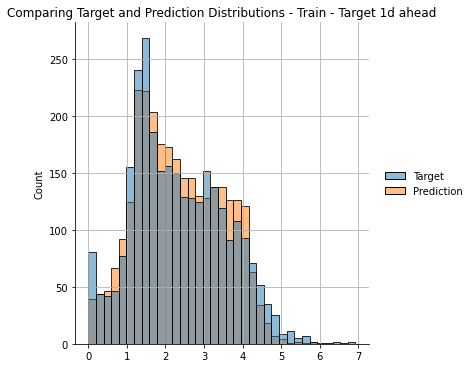

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.93 (1.32)
MAE 0.71
RMSE 1.04



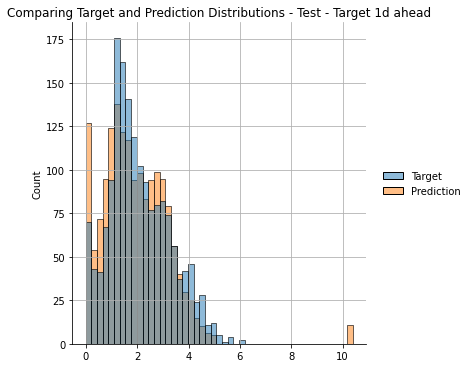

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 1d ahead.
Train size: (2905, 558)
Test size: (1689, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.08)
MAE 0.37
RMSE 0.51



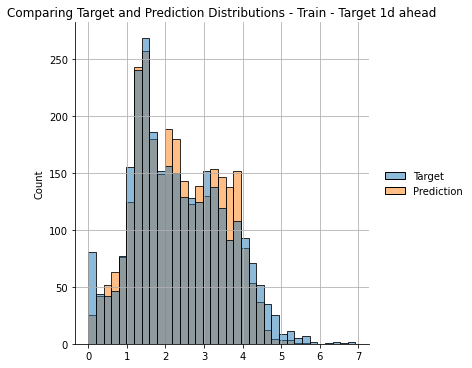

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.01 (1.03)
MAE 0.48
RMSE 0.66



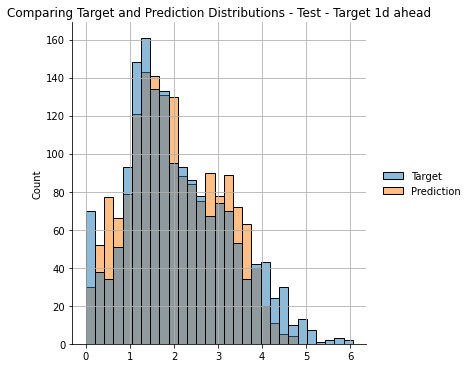

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 1d ahead.
Train size: (2905, 558)
Test size: (1689, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.14)
MAE 0.14
RMSE 0.19



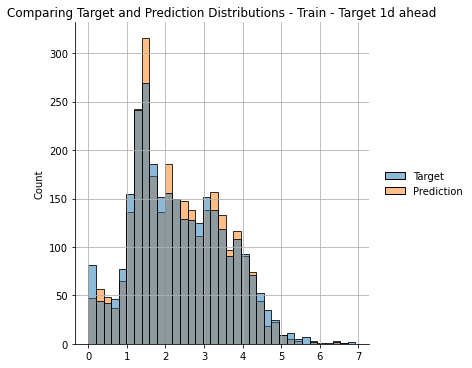

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.16 (1.05)
MAE 0.48
RMSE 0.64



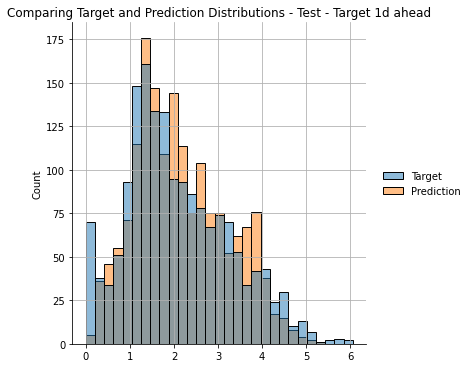

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 2d ahead.
Train size: (2904, 558)
Test size: (1684, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.08)
MAE 0.39
RMSE 0.52



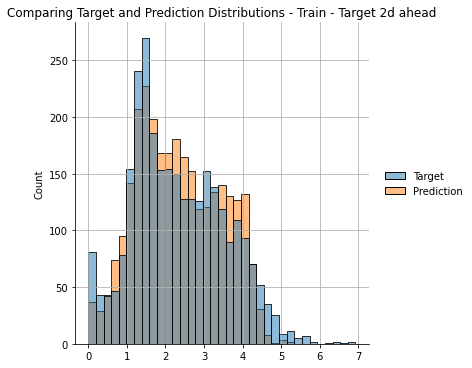

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.65 (1.15)
MAE 0.85
RMSE 1.14



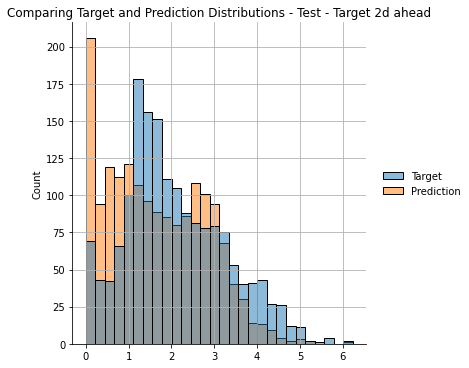

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 2d ahead.
Train size: (2904, 558)
Test size: (1684, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.04)
MAE 0.43
RMSE 0.58



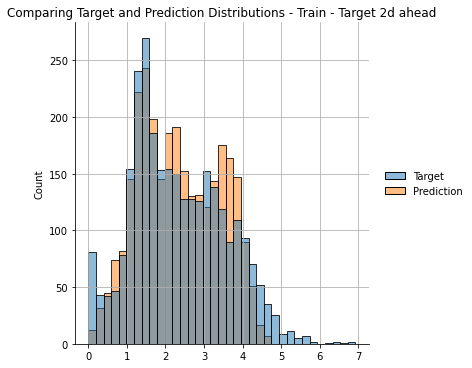

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.99 (1.02)
MAE 0.62
RMSE 0.84



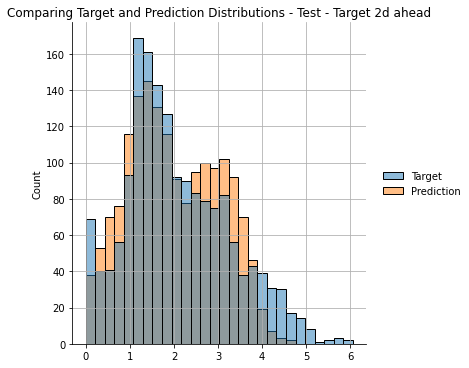

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 2d ahead.
Train size: (2904, 558)
Test size: (1684, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.14)
MAE 0.15
RMSE 0.19



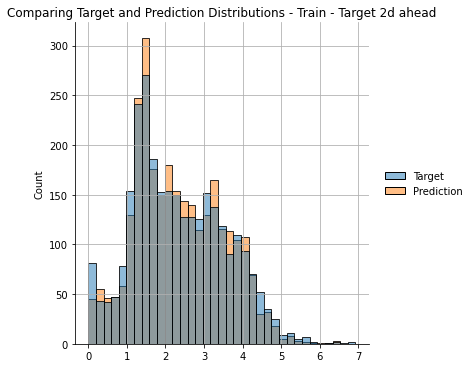

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.26 (1.06)
MAE 0.62
RMSE 0.83



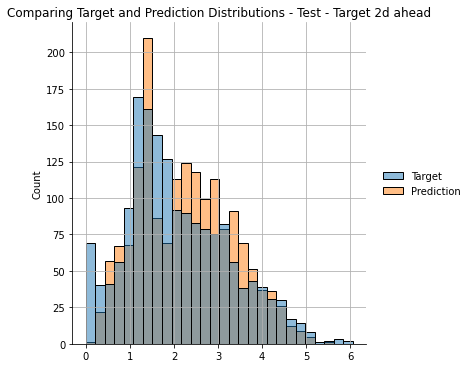

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 3d ahead.
Train size: (2904, 558)
Test size: (1678, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.09)
MAE 0.40
RMSE 0.52



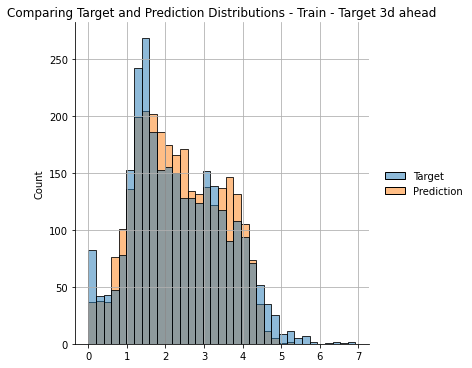

Target distribution [mean(std)]:  2.07 (1.17)
Prediction distribution [mean(std)]:  1.60 (1.25)
MAE 0.92
RMSE 1.22



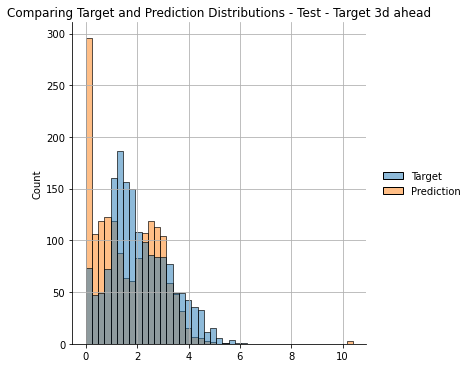

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 3d ahead.
Train size: (2904, 558)
Test size: (1678, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.04)
MAE 0.43
RMSE 0.59



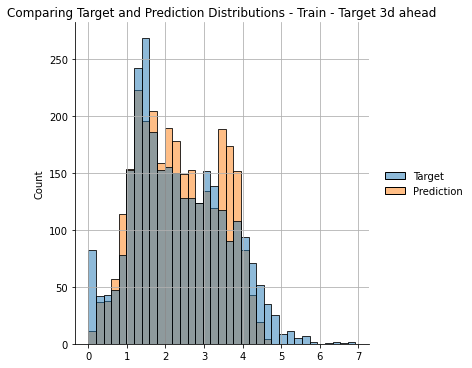

Target distribution [mean(std)]:  2.07 (1.17)
Prediction distribution [mean(std)]:  2.00 (1.04)
MAE 0.66
RMSE 0.89



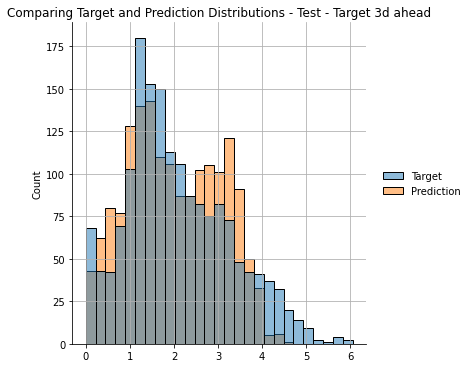

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 3d ahead.
Train size: (2904, 558)
Test size: (1678, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.14)
MAE 0.15
RMSE 0.19



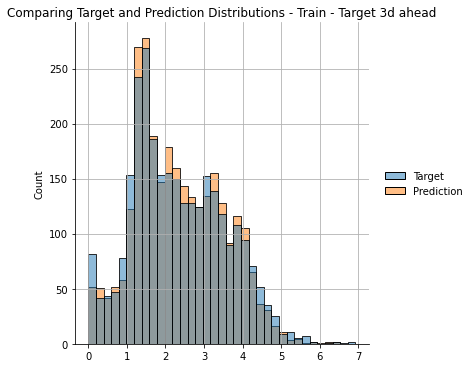

Target distribution [mean(std)]:  2.07 (1.17)
Prediction distribution [mean(std)]:  2.23 (1.09)
MAE 0.62
RMSE 0.83



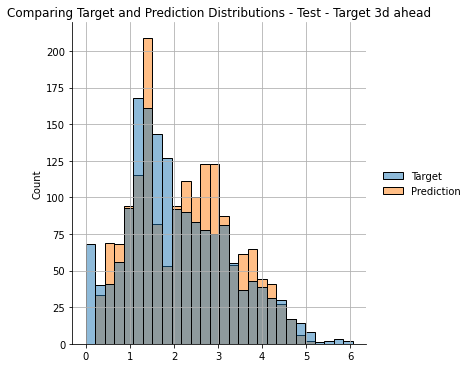

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 4d ahead.
Train size: (2903, 558)
Test size: (1673, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.09)
MAE 0.39
RMSE 0.51



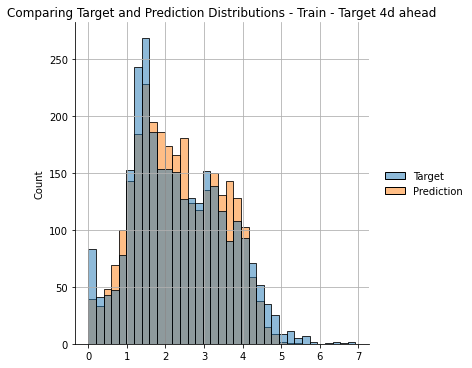

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.62 (1.31)
MAE 0.93
RMSE 1.23



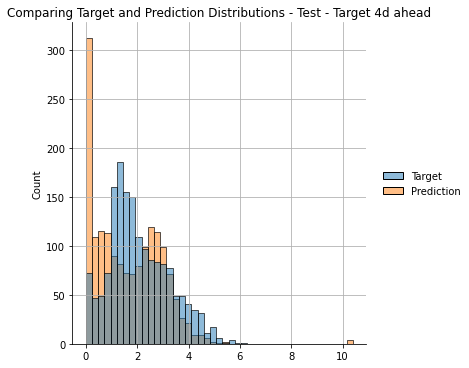

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 4d ahead.
Train size: (2903, 558)
Test size: (1673, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.04)
MAE 0.44
RMSE 0.59



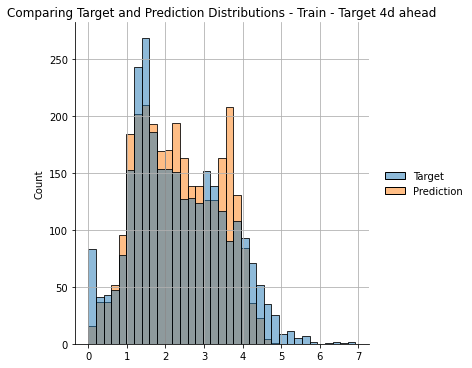

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.00 (1.04)
MAE 0.66
RMSE 0.88



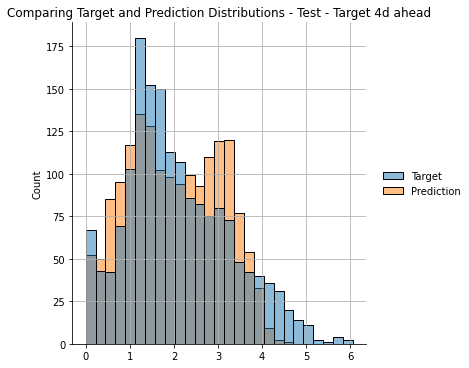

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 4d ahead.
Train size: (2903, 558)
Test size: (1673, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.14)
MAE 0.15
RMSE 0.19



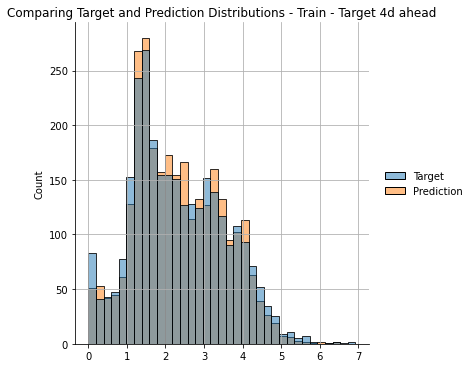

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.21 (1.12)
MAE 0.61
RMSE 0.82



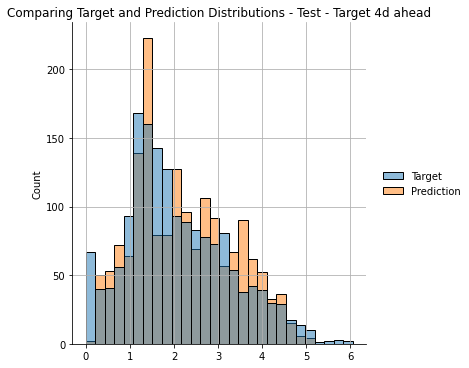

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 5d ahead.
Train size: (2902, 558)
Test size: (1668, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.33 (1.09)
MAE 0.39
RMSE 0.51



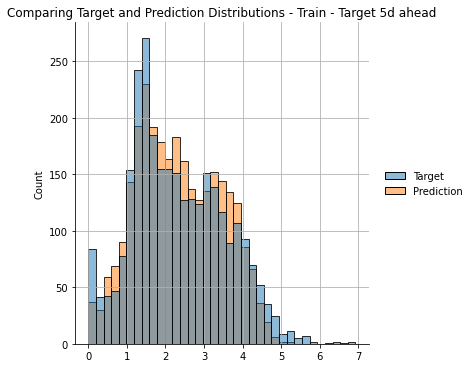

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.58 (1.27)
MAE 0.92
RMSE 1.23



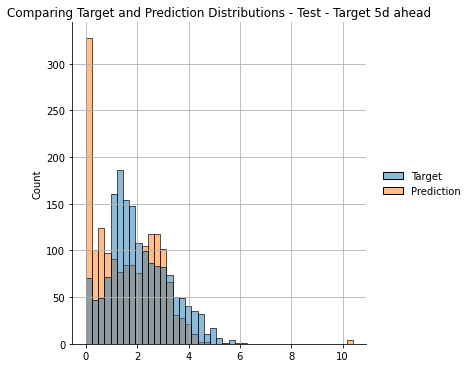

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 5d ahead.
Train size: (2902, 558)
Test size: (1668, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.04)
MAE 0.44
RMSE 0.59



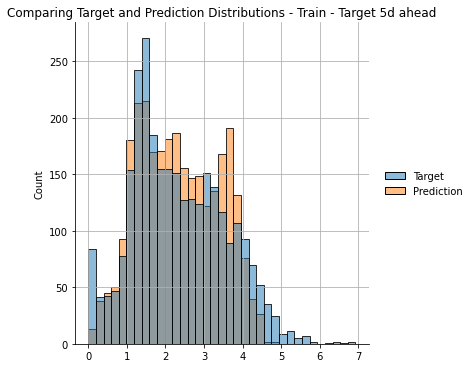

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.96 (1.04)
MAE 0.66
RMSE 0.89



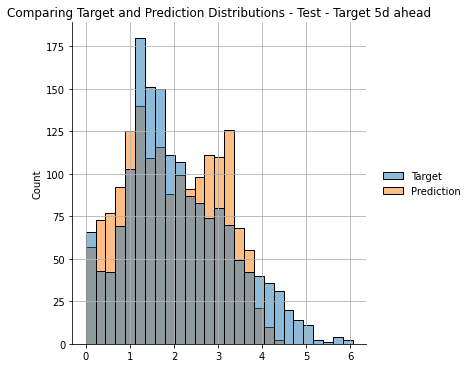

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 5d ahead.
Train size: (2902, 558)
Test size: (1668, 558)
Target distribution [mean(std)]:  2.34 (1.20)
Prediction distribution [mean(std)]:  2.34 (1.14)
MAE 0.14
RMSE 0.19



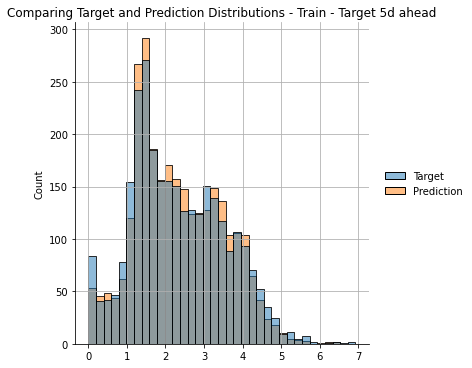

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.16 (1.08)
MAE 0.60
RMSE 0.81



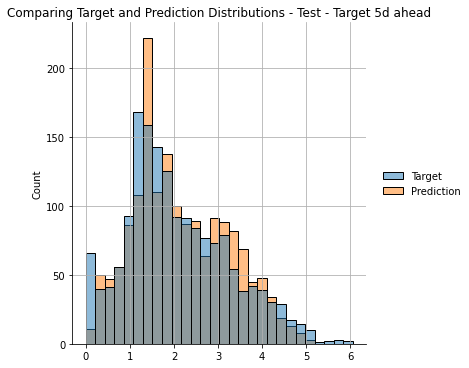

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 6d ahead.
Train size: (2902, 558)
Test size: (1663, 558)
Target distribution [mean(std)]:  2.33 (1.20)
Prediction distribution [mean(std)]:  2.35 (1.08)
MAE 0.39
RMSE 0.52



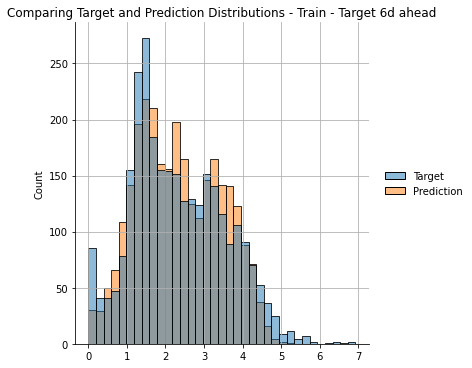

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.66 (1.21)
MAE 0.88
RMSE 1.18



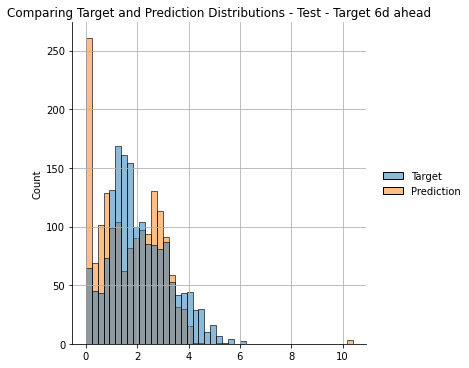

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 6d ahead.
Train size: (2902, 558)
Test size: (1663, 558)
Target distribution [mean(std)]:  2.33 (1.20)
Prediction distribution [mean(std)]:  2.33 (1.03)
MAE 0.44
RMSE 0.59



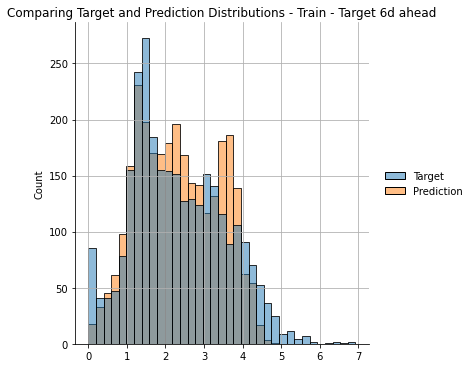

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.95 (1.04)
MAE 0.65
RMSE 0.87



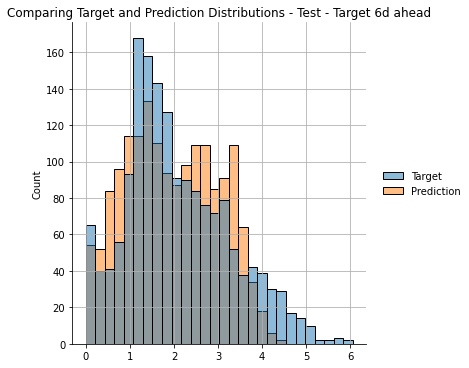

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 6d ahead.
Train size: (2902, 558)
Test size: (1663, 558)
Target distribution [mean(std)]:  2.33 (1.20)
Prediction distribution [mean(std)]:  2.33 (1.14)
MAE 0.15
RMSE 0.19



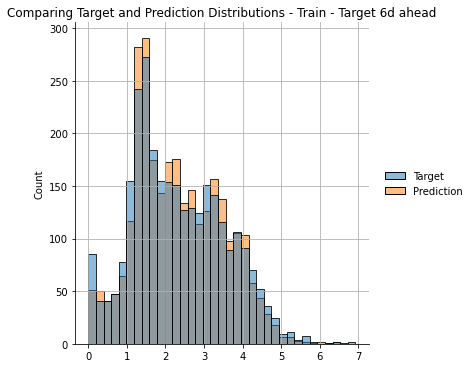

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.14 (1.06)
MAE 0.58
RMSE 0.79



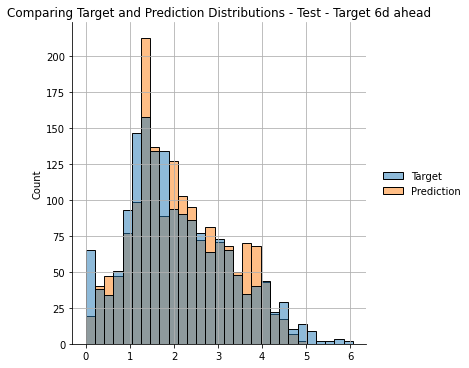

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 7d ahead.
Train size: (2902, 558)
Test size: (1658, 558)
Target distribution [mean(std)]:  2.33 (1.20)
Prediction distribution [mean(std)]:  2.33 (1.08)
MAE 0.39
RMSE 0.52



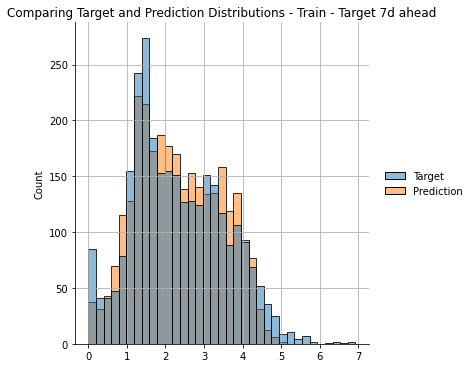

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.67 (1.18)
MAE 0.84
RMSE 1.13



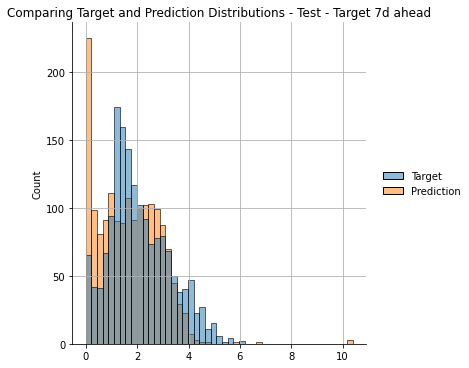

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 7d ahead.
Train size: (2902, 558)
Test size: (1658, 558)
Target distribution [mean(std)]:  2.33 (1.20)
Prediction distribution [mean(std)]:  2.33 (1.04)
MAE 0.44
RMSE 0.59



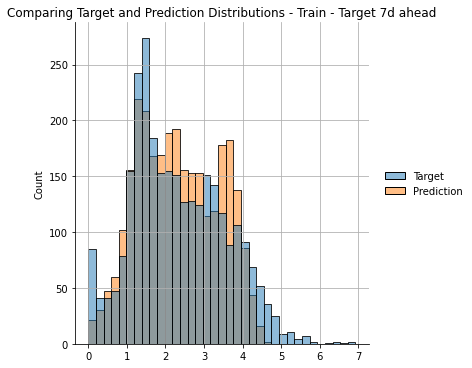

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  1.95 (1.03)
MAE 0.62
RMSE 0.83



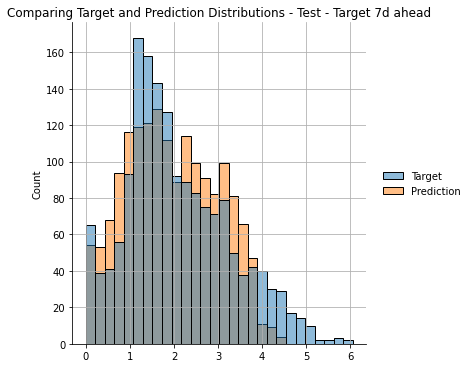

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 7d ahead.
Train size: (2902, 558)
Test size: (1658, 558)
Target distribution [mean(std)]:  2.33 (1.20)
Prediction distribution [mean(std)]:  2.33 (1.14)
MAE 0.15
RMSE 0.19



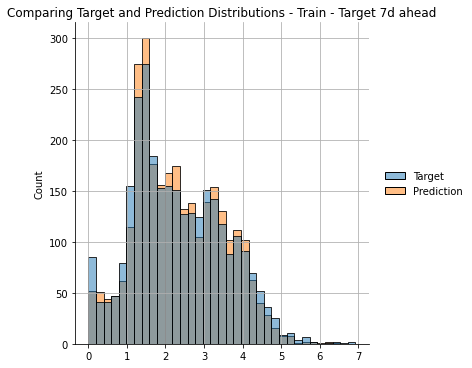

Target distribution [mean(std)]:  2.08 (1.17)
Prediction distribution [mean(std)]:  2.13 (1.06)
MAE 0.56
RMSE 0.77



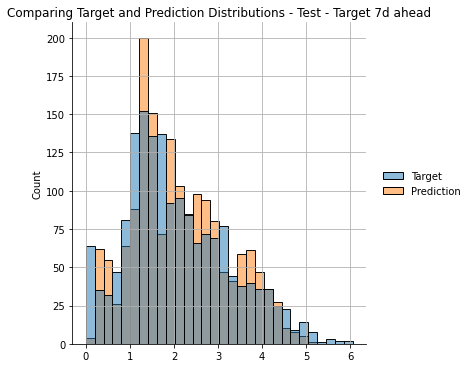

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




In [50]:
targets_to_drop = [
'WIND_DIRECTION_degrees_target_1d',
'WIND_MAX_GUNS_ms_target_1d',
'WIND_SPEED_ms_target_1d',
'WIND_DIRECTION_degrees_target_2d',
'WIND_MAX_GUNS_ms_target_2d',
'WIND_SPEED_ms_target_2d',
'WIND_DIRECTION_degrees_target_3d',
'WIND_MAX_GUNS_ms_target_3d',
'WIND_SPEED_ms_target_3d',
'WIND_DIRECTION_degrees_target_4d',
'WIND_MAX_GUNS_ms_target_4d',
'WIND_SPEED_ms_target_4d',
'WIND_DIRECTION_degrees_target_5d',
'WIND_MAX_GUNS_ms_target_5d',
'WIND_SPEED_ms_target_5d',
'WIND_DIRECTION_degrees_target_6d',
'WIND_MAX_GUNS_ms_target_6d',
'WIND_SPEED_ms_target_6d',
'WIND_DIRECTION_degrees_target_7d',
'WIND_MAX_GUNS_ms_target_7d',
'WIND_SPEED_ms_target_7d'
]
 
df_experiment_tracking_wind_speed = run_experiments(df,
                models=[LinearRegression(n_jobs=-1),
                Ridge(),
                LGBMRegressor()],
                use_validation=False,
                target_time_windows=['1d','2d','3d','4d','5d','6d','7d'],
                targets_to_drop=targets_to_drop,
                target_name='WIND_SPEED_ms')

In [41]:
df_experiment_tracking_wind_speed.query("TARGET_TIME_WINDOW == '1d'")[['TARGET_TIME_WINDOW','MODEL_NAME','MAE_TEST','RMSE_TEST']]

,TARGET_TIME_WINDOW,MODEL_NAME,MAE_TEST,RMSE_TEST
0,1d,LinearRegression,0.705154,1.042681
1,1d,Ridge,0.484249,0.658162
2,1d,LGBMRegressor,0.476577,0.644647


In [46]:
df_experiment_tracking_wind_speed.groupby('MODEL_NAME').mean()[['MAE_TEST','RMSE_TEST']]

,MAE_TEST,RMSE_TEST
MODEL_NAME,,
LGBMRegressor,0.580948,0.784364
LinearRegression,0.862888,1.166397
Ridge,0.621842,0.836475


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 1d ahead.
Train size: (2905, 551)
Test size: (1689, 551)
Target distribution [mean(std)]:  122.29 (31.69)
Prediction distribution [mean(std)]:  122.39 (26.08)
MAE 13.83
RMSE 18.22



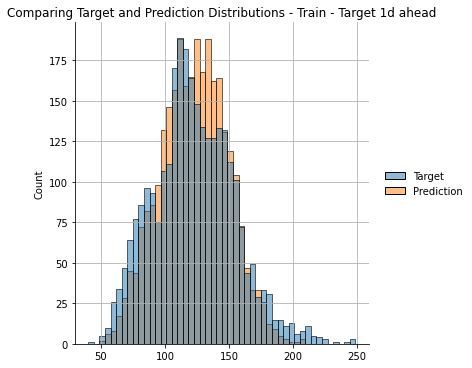

Target distribution [mean(std)]:  130.60 (37.86)
Prediction distribution [mean(std)]:  128.43 (39.80)
MAE 32.19
RMSE 42.75



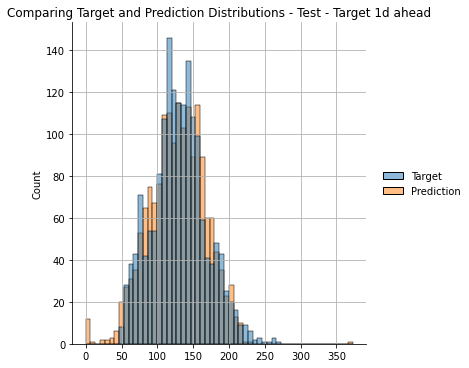

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 1d ahead.
Train size: (2905, 551)
Test size: (1689, 551)
Target distribution [mean(std)]:  122.29 (31.69)
Prediction distribution [mean(std)]:  122.29 (24.00)
MAE 14.81
RMSE 20.04



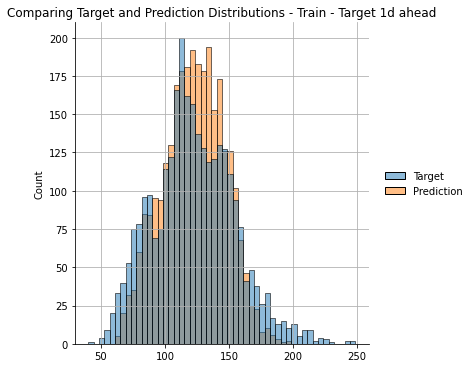

Target distribution [mean(std)]:  130.60 (37.86)
Prediction distribution [mean(std)]:  132.03 (27.42)
MAE 21.50
RMSE 28.54



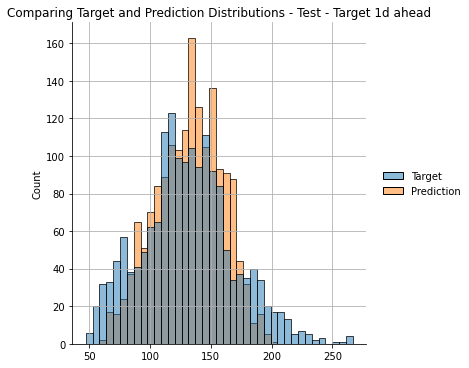

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 1d ahead.
Train size: (2905, 551)
Test size: (1689, 551)
Target distribution [mean(std)]:  122.29 (31.69)
Prediction distribution [mean(std)]:  122.29 (28.18)
MAE 5.59
RMSE 7.39



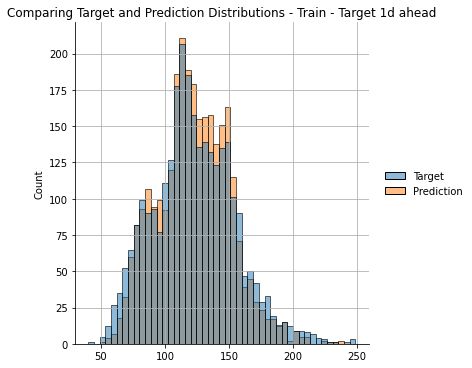

Target distribution [mean(std)]:  130.60 (37.86)
Prediction distribution [mean(std)]:  129.08 (22.86)
MAE 20.58
RMSE 27.92



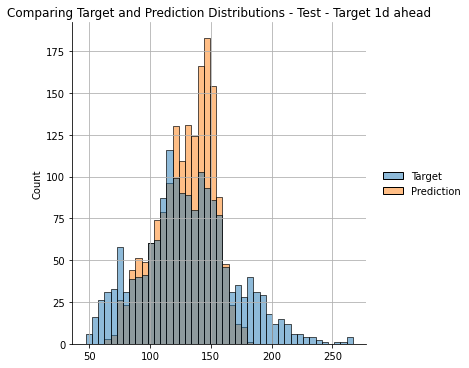

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 2d ahead.
Train size: (2904, 551)
Test size: (1684, 551)
Target distribution [mean(std)]:  122.26 (31.73)
Prediction distribution [mean(std)]:  122.44 (25.32)
MAE 14.76
RMSE 19.24



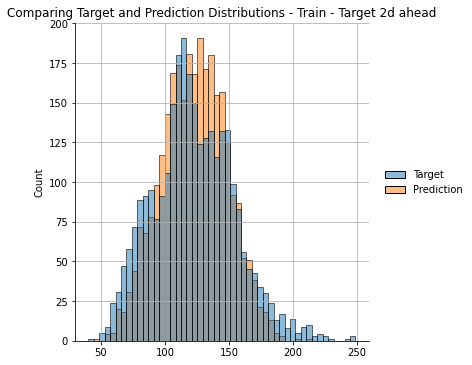

Target distribution [mean(std)]:  130.71 (37.85)
Prediction distribution [mean(std)]:  132.32 (41.95)
MAE 37.71
RMSE 49.15



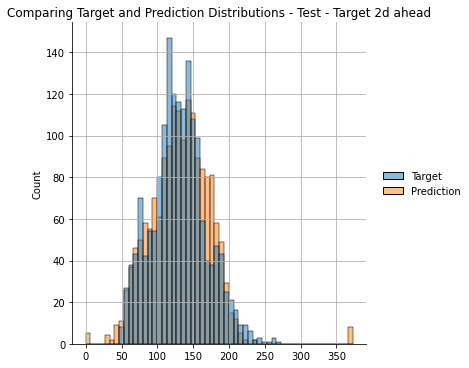

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 2d ahead.
Train size: (2904, 551)
Test size: (1684, 551)
Target distribution [mean(std)]:  122.26 (31.73)
Prediction distribution [mean(std)]:  122.26 (22.40)
MAE 16.13
RMSE 21.65



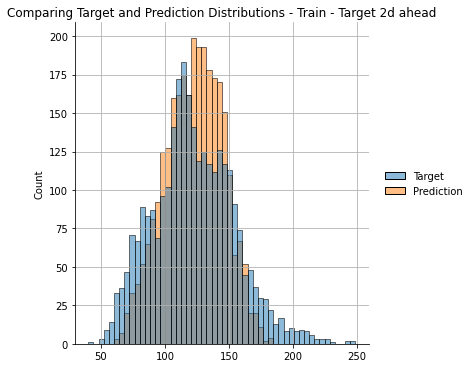

Target distribution [mean(std)]:  130.71 (37.85)
Prediction distribution [mean(std)]:  133.02 (26.35)
MAE 25.44
RMSE 33.15



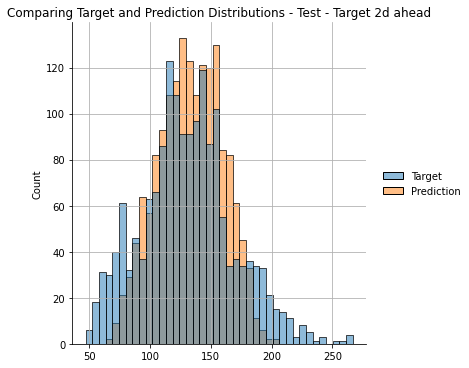

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 2d ahead.
Train size: (2904, 551)
Test size: (1684, 551)
Target distribution [mean(std)]:  122.26 (31.73)
Prediction distribution [mean(std)]:  122.26 (27.83)
MAE 5.63
RMSE 7.45



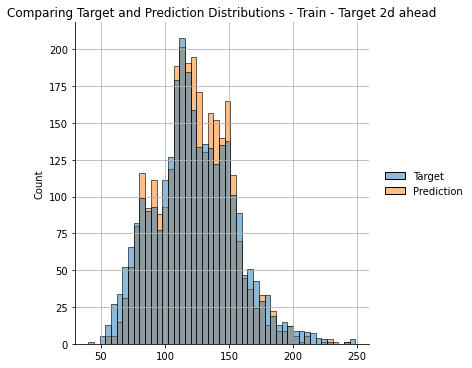

Target distribution [mean(std)]:  130.71 (37.85)
Prediction distribution [mean(std)]:  127.15 (21.00)
MAE 23.03
RMSE 31.61



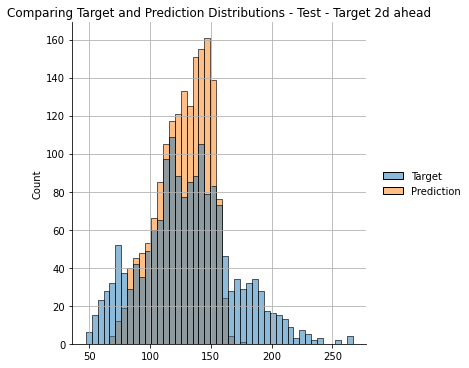

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 3d ahead.
Train size: (2904, 551)
Test size: (1678, 551)
Target distribution [mean(std)]:  122.31 (31.80)
Prediction distribution [mean(std)]:  122.22 (25.05)
MAE 15.07
RMSE 19.67



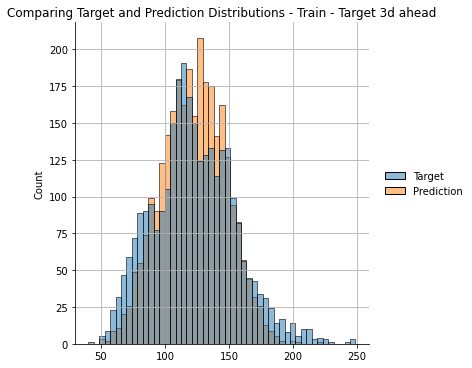

Target distribution [mean(std)]:  130.78 (37.78)
Prediction distribution [mean(std)]:  132.12 (42.36)
MAE 38.06
RMSE 49.82



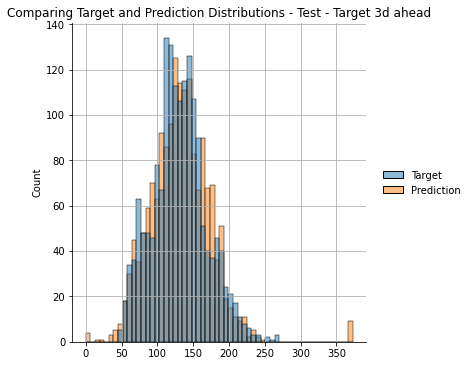

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 3d ahead.
Train size: (2904, 551)
Test size: (1678, 551)
Target distribution [mean(std)]:  122.31 (31.80)
Prediction distribution [mean(std)]:  122.31 (21.98)
MAE 16.60
RMSE 22.06



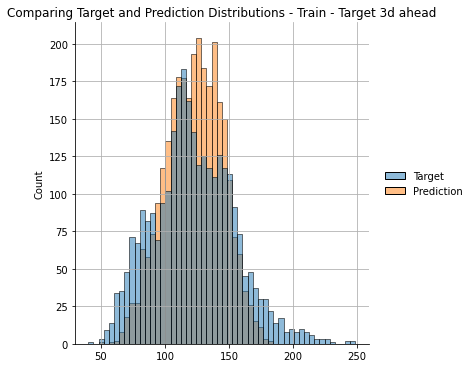

Target distribution [mean(std)]:  130.78 (37.78)
Prediction distribution [mean(std)]:  133.53 (26.63)
MAE 26.73
RMSE 34.68



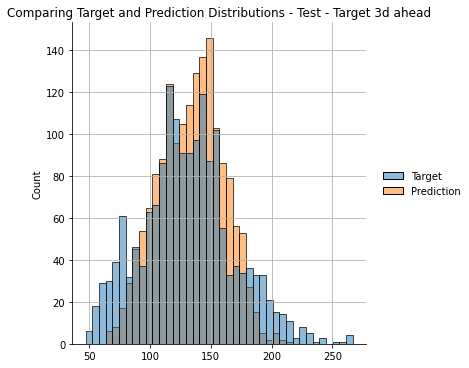

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 3d ahead.
Train size: (2904, 551)
Test size: (1678, 551)
Target distribution [mean(std)]:  122.31 (31.80)
Prediction distribution [mean(std)]:  122.31 (27.84)
MAE 5.68
RMSE 7.61



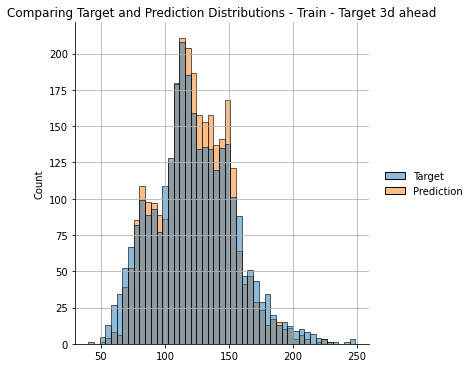

Target distribution [mean(std)]:  130.78 (37.78)
Prediction distribution [mean(std)]:  126.41 (22.08)
MAE 23.98
RMSE 32.64



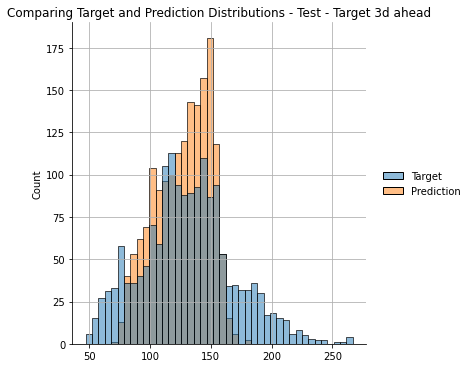

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 4d ahead.
Train size: (2903, 551)
Test size: (1673, 551)
Target distribution [mean(std)]:  122.34 (31.83)
Prediction distribution [mean(std)]:  122.47 (25.01)
MAE 15.03
RMSE 19.72



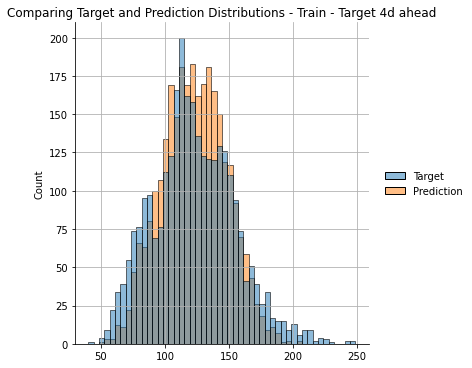

Target distribution [mean(std)]:  130.85 (37.69)
Prediction distribution [mean(std)]:  128.24 (38.62)
MAE 35.80
RMSE 46.38



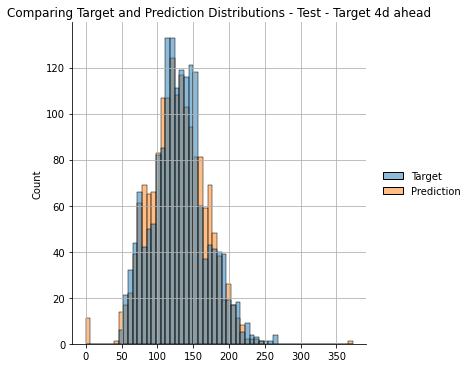

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 4d ahead.
Train size: (2903, 551)
Test size: (1673, 551)
Target distribution [mean(std)]:  122.34 (31.83)
Prediction distribution [mean(std)]:  122.34 (21.82)
MAE 16.71
RMSE 22.23



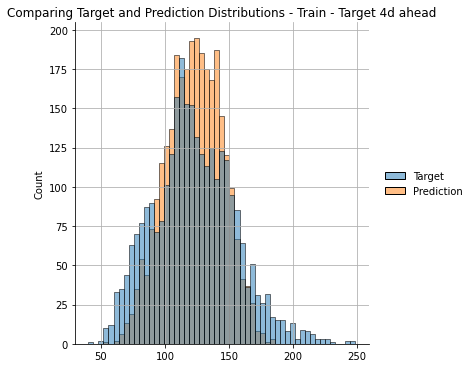

Target distribution [mean(std)]:  130.85 (37.69)
Prediction distribution [mean(std)]:  133.40 (26.98)
MAE 27.91
RMSE 36.04



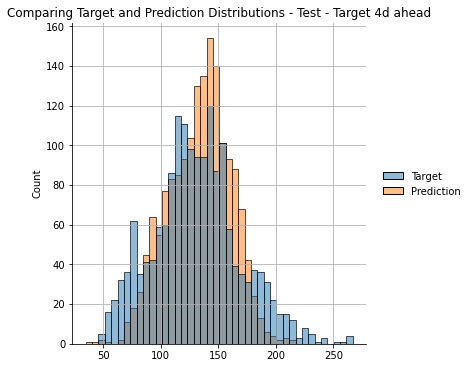

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 4d ahead.
Train size: (2903, 551)
Test size: (1673, 551)
Target distribution [mean(std)]:  122.34 (31.83)
Prediction distribution [mean(std)]:  122.34 (27.90)
MAE 5.59
RMSE 7.46



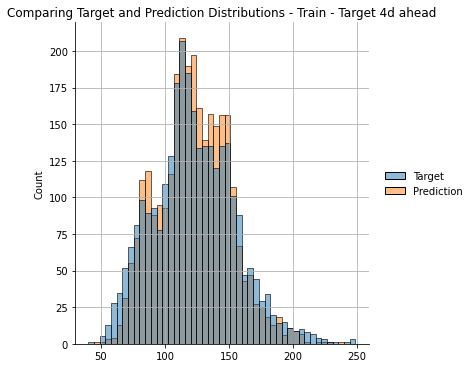

Target distribution [mean(std)]:  130.85 (37.69)
Prediction distribution [mean(std)]:  127.08 (21.11)
MAE 23.48
RMSE 32.16



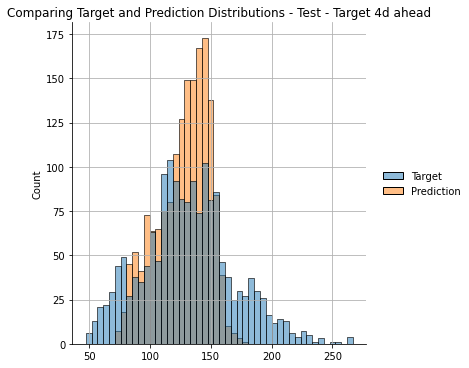

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 5d ahead.
Train size: (2902, 551)
Test size: (1668, 551)
Target distribution [mean(std)]:  122.40 (31.89)
Prediction distribution [mean(std)]:  122.26 (25.56)
MAE 15.62
RMSE 20.22



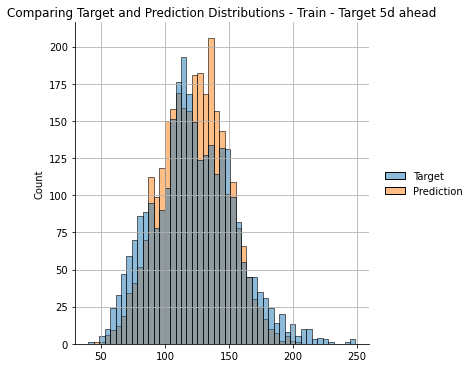

Target distribution [mean(std)]:  130.85 (37.56)
Prediction distribution [mean(std)]:  133.48 (43.91)
MAE 36.89
RMSE 49.63



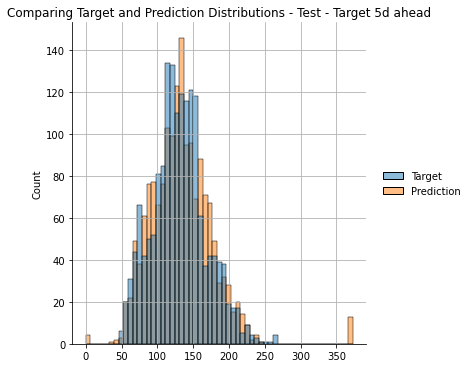

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 5d ahead.
Train size: (2902, 551)
Test size: (1668, 551)
Target distribution [mean(std)]:  122.40 (31.89)
Prediction distribution [mean(std)]:  122.40 (21.71)
MAE 16.76
RMSE 22.38



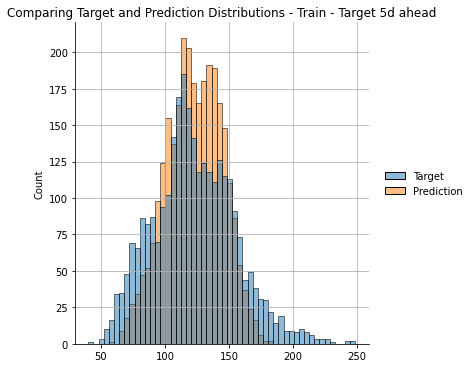

Target distribution [mean(std)]:  130.85 (37.56)
Prediction distribution [mean(std)]:  134.68 (27.89)
MAE 28.28
RMSE 36.40



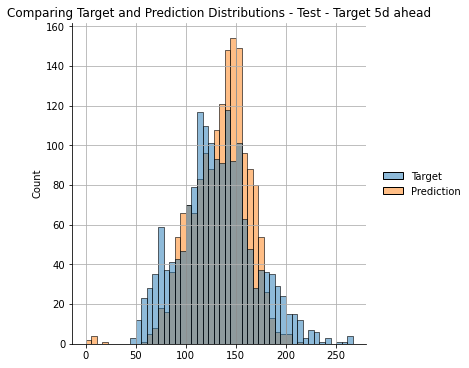

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 5d ahead.
Train size: (2902, 551)
Test size: (1668, 551)
Target distribution [mean(std)]:  122.40 (31.89)
Prediction distribution [mean(std)]:  122.40 (27.96)
MAE 5.71
RMSE 7.61



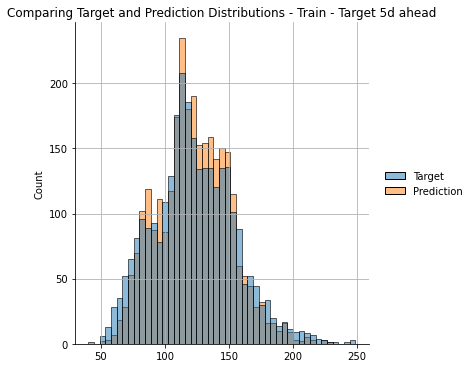

Target distribution [mean(std)]:  130.85 (37.56)
Prediction distribution [mean(std)]:  127.63 (22.00)
MAE 23.90
RMSE 32.41



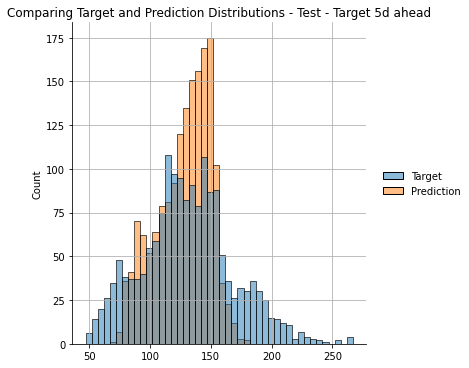

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 6d ahead.
Train size: (2902, 551)
Test size: (1663, 551)
Target distribution [mean(std)]:  122.43 (31.84)
Prediction distribution [mean(std)]:  122.28 (25.26)
MAE 15.36
RMSE 19.95



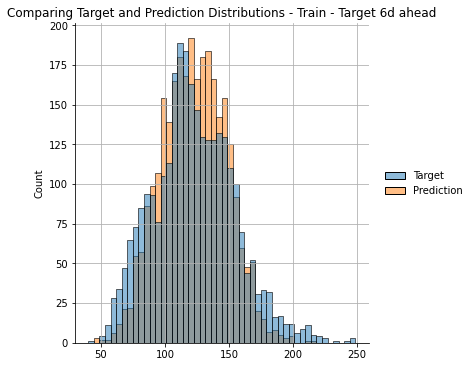

Target distribution [mean(std)]:  130.96 (37.50)
Prediction distribution [mean(std)]:  140.57 (43.17)
MAE 35.98
RMSE 47.66



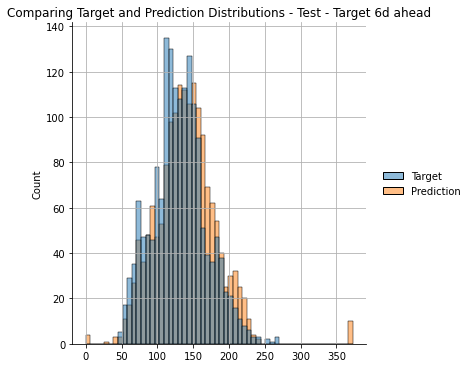

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 6d ahead.
Train size: (2902, 551)
Test size: (1663, 551)
Target distribution [mean(std)]:  122.43 (31.84)
Prediction distribution [mean(std)]:  122.43 (21.68)
MAE 16.74
RMSE 22.36



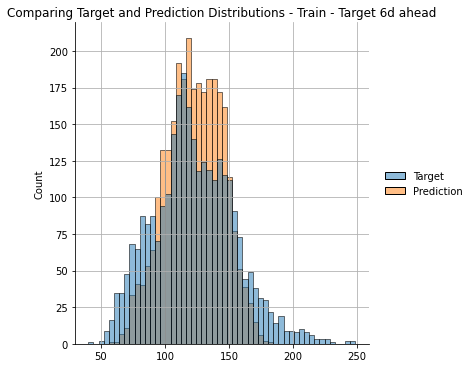

Target distribution [mean(std)]:  130.96 (37.50)
Prediction distribution [mean(std)]:  135.38 (27.66)
MAE 27.57
RMSE 35.14



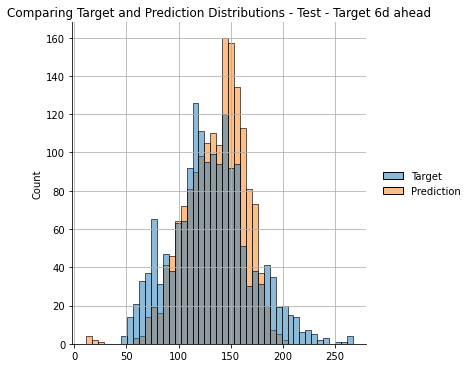

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 6d ahead.
Train size: (2902, 551)
Test size: (1663, 551)
Target distribution [mean(std)]:  122.43 (31.84)
Prediction distribution [mean(std)]:  122.43 (27.90)
MAE 5.75
RMSE 7.71



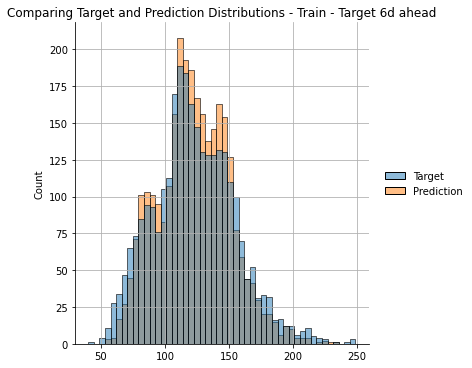

Target distribution [mean(std)]:  130.96 (37.50)
Prediction distribution [mean(std)]:  126.38 (20.69)
MAE 23.96
RMSE 32.69



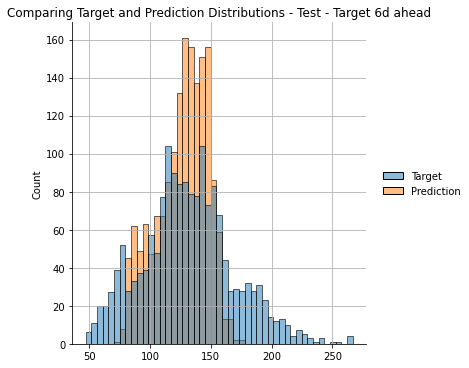

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_DIRECTION_degrees 7d ahead.
Train size: (2902, 551)
Test size: (1658, 551)
Target distribution [mean(std)]:  122.47 (31.80)
Prediction distribution [mean(std)]:  122.44 (24.83)
MAE 15.25
RMSE 19.89



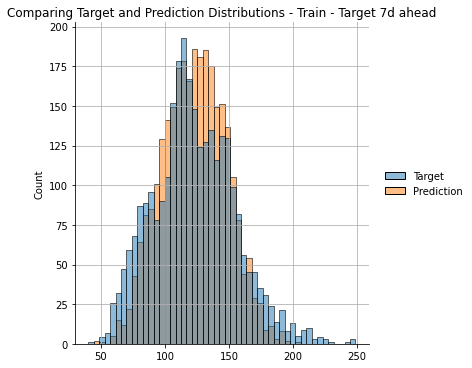

Target distribution [mean(std)]:  131.10 (37.38)
Prediction distribution [mean(std)]:  146.80 (40.19)
MAE 34.89
RMSE 46.51



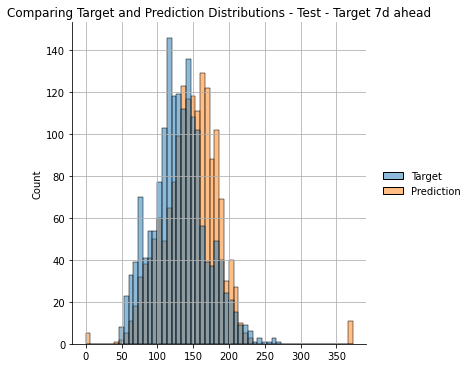

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_DIRECTION_degrees 7d ahead.
Train size: (2902, 551)
Test size: (1658, 551)
Target distribution [mean(std)]:  122.47 (31.80)
Prediction distribution [mean(std)]:  122.47 (21.70)
MAE 16.73
RMSE 22.31



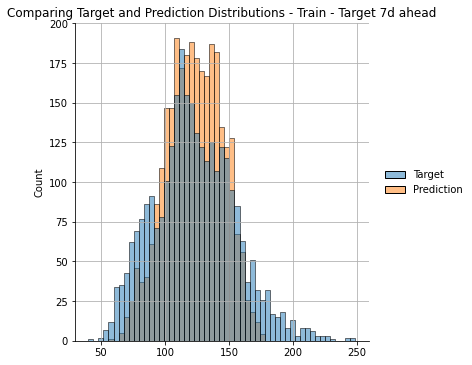

Target distribution [mean(std)]:  131.10 (37.38)
Prediction distribution [mean(std)]:  134.93 (27.48)
MAE 26.44
RMSE 34.11



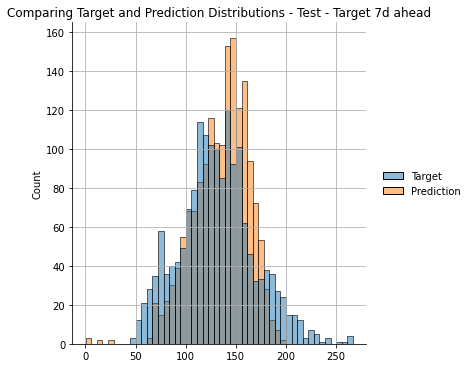

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_DIRECTION_degrees 7d ahead.
Train size: (2902, 551)
Test size: (1658, 551)
Target distribution [mean(std)]:  122.47 (31.80)
Prediction distribution [mean(std)]:  122.47 (27.89)
MAE 5.63
RMSE 7.53



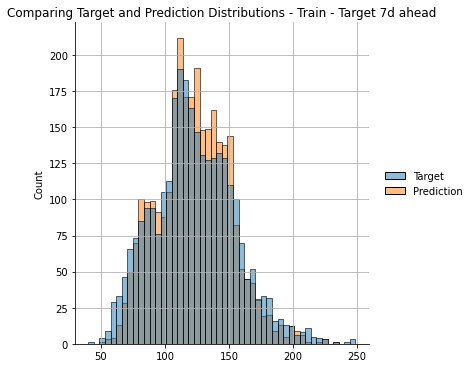

Target distribution [mean(std)]:  131.10 (37.38)
Prediction distribution [mean(std)]:  128.12 (21.66)
MAE 23.52
RMSE 31.98



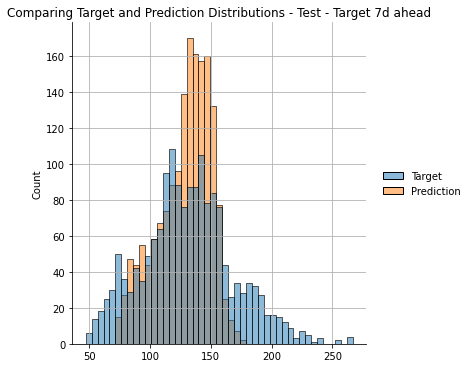

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




In [22]:
targets_to_drop = [
'WIND_DIRECTION_degrees_target_1d',
'WIND_MAX_GUNS_ms_target_1d',
'WIND_SPEED_ms_target_1d',
'WIND_DIRECTION_degrees_target_2d',
'WIND_MAX_GUNS_ms_target_2d',
'WIND_SPEED_ms_target_2d',
'WIND_DIRECTION_degrees_target_3d',
'WIND_MAX_GUNS_ms_target_3d',
'WIND_SPEED_ms_target_3d',
'WIND_DIRECTION_degrees_target_4d',
'WIND_MAX_GUNS_ms_target_4d',
'WIND_SPEED_ms_target_4d',
'WIND_DIRECTION_degrees_target_5d',
'WIND_MAX_GUNS_ms_target_5d',
'WIND_SPEED_ms_target_5d',
'WIND_DIRECTION_degrees_target_6d',
'WIND_MAX_GUNS_ms_target_6d',
'WIND_SPEED_ms_target_6d',
'WIND_DIRECTION_degrees_target_7d',
'WIND_MAX_GUNS_ms_target_7d',
'WIND_SPEED_ms_target_7d'
]
 
df_experiment_tracking_wind_direction = run_experiments(df,
                models=[LinearRegression(n_jobs=-1),
                Ridge(),
                LGBMRegressor()],
                use_validation=False,
                target_time_windows=['1d','2d','3d','4d','5d','6d','7d'],
                targets_to_drop=targets_to_drop,
                target_name='WIND_DIRECTION_degrees')

In [23]:
df_experiment_tracking_wind_direction.query("TARGET_TIME_WINDOW == '1d'")

,TARGET_NAME,TARGET_TIME_WINDOW,MODEL_NAME,RMSE_TRAIN,MAE_TRAIN,RMSE_VALIDATION,MAE_VALIDATION,RMSE_TEST,MAE_TEST
0,WIND_DIRECTION_degrees,1d,LinearRegression,18.218452,13.831257,None,None,42.751084,32.190768
1,WIND_DIRECTION_degrees,1d,Ridge,20.037076,14.813767,None,None,28.536004,21.495219
2,WIND_DIRECTION_degrees,1d,LGBMRegressor,7.393569,5.594144,None,None,27.919922,20.575896


In [24]:
df_experiment_tracking_wind_direction.groupby('MODEL_NAME').mean()

,RMSE_TRAIN,MAE_TRAIN,RMSE_TEST,MAE_TEST
MODEL_NAME,,,,
LGBMRegressor,7.537260,5.655758,31.631286,23.204834
LinearRegression,19.557882,14.989342,47.414643,35.932635
Ridge,21.862048,16.353821,34.008273,26.267943
